## Simulazione II Esame di Metodi Numerici Soluzioni##

Nel file ``Test_I.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3. 
- Risolvere i 3 sistemi lineari aventi matrice dei coefficienti A1 e termine noto b1, matrice dei coefficienti A2 e termine noto b2, matrice dei coefficienti A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.

                                                                                            punti 12
                                                                                            
- Verificare se le matrici sono malcondizionate. Indicare la formula matematica dell'indice di condizionamento e spiegare perchè è importante conoscere l'indice di condizionamento di una matrice.
                                                                                           
                                                                                           punti 2

- Dopo aver copiato nel numpy array b1p il termine noto b1 del primo sistema lineare con matrice dei coefficienti A1, effettuarne una perturbazione della prima componente nel seguente modo b1p[0]=b1p[0]+0.001*b1p[0]. Risolvere il sistema lineare con matrice A1 e termine noto perturbato b1p. Calcolare l'errore relativo sulla soluzione e l'errore relativo sul termine noto, descrivere ciò che si verifica giustificandolo alla luce della teoria.

                                                                                           punti 2


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Test_II.mat')``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

``A2=dati["A2"] ``

``A2=A2.astype(float)``

`` b2=dati["b2"] ``

`` b2=b2.astype(float)``

``A3=dati["A3"] ``

``A3=A3.astype(float)``

`` b3=dati["b3"] ``

`` b3=b3.astype(float)``



                                                                    Punti 16

In [3]:
from scipy.io import loadmat
import numpy as np

dati = loadmat('Test_I.mat')

A1=dati["A1"] 

A1=A1.astype(float)

b1=dati["b1"] 

b1=b1.astype(float)

A2=dati["A2"] 

A2=A2.astype(float)

b2=dati["b2"] 

b2=b2.astype(float)

A3=dati["A3"] 

A3=A3.astype(float)

b3=dati["b3"] 

b3=b3.astype(float)


In [4]:
import numpy as np
def checkDefPos(A):
    autoVal,AutoVet = np.linalg.eig(A)
    if np.all(autoVal>0) == True:
        print("definita positiva")
    else:
        print("non definita positiva")

def checkSimmetrica(A):
    flag = A.T == A
    if np.all(flag):
        print("simmetrica")
        return True
    print("non simmetrica")
    return False

def calcCondition(A):
    cond = np.linalg.cond(A)
    print("indice di condizionamento pari a {:e}".format(cond))
    if cond <= 10**2:
        print("ben condizionata")
    elif cond >10 ** 2 and cond < 10**4:
        print("mediamente condizionata")
    else :
        print("mal condizionata")

def checkSparsa(A):
    non_zero = np.count_nonzero(A)
    perc =non_zero/(A.shape[0]*A.shape[1])*100
    if perc >= 33:
        print("matrice densa")
    else:
        print("matrice sparsa")
    print(perc)

def checkMaxRank(A):
    r = np.linalg.matrix_rank(A)

    if r == np.min(A.shape):
        print("rango massimo")
    else:
        print("no rango massimo")

def getInfo(A):
    print(A.shape[0] , A.shape[1])
    if A.shape[0] == A.shape[1]:
        print("matrice quadrata")
    else:
        print("matrice non quadrata")
    checkSparsa(A)
    calcCondition(A)
    checkMaxRank(A)
    if checkSimmetrica(A):
        checkDefPos(A)
    else :
        "non simmetrica quindi non definita positiva"
        

In [5]:
getInfo(A1)
print("-----------------")
getInfo(A2)
print("-----------------")
getInfo(A3)


10 10
matrice quadrata
matrice densa
100.0
indice di condizionamento pari a 1.206149e+02
mediamente condizionata
rango massimo
simmetrica
non definita positiva
-----------------
25 10
matrice non quadrata
matrice densa
100.0
indice di condizionamento pari a 1.000000e+04
mal condizionata
rango massimo
-----------------
225 225
matrice quadrata
matrice sparsa
2.1037037037037036
indice di condizionamento pari a 1.030869e+02
mediamente condizionata
rango massimo
simmetrica
definita positiva


/var/folders/q4/mjc60_153h77rttjvp7nh8mr0000gn/T/ipykernel_1005/2147471776.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  flag = A.T == A


## Osservazioni ##
1. per A1 posso utilizzare la fattorizzazione di Gauss dato che è mediamente condizionata ma non altamente da utilizzare il metodo QR.
2. per A2 posso utilizzare il metodo QRLS dato che non è quadrata, è mal condizionata ma non altamente da utilizzare il metodo SVDLS, ed ha rango massimo.
3. per A3 posso utilizzare i metodo di discesa del gradiente oppure Gauss_Seidel , dato che è considerabile di grandi dimensioni, è sparsa,quadrata , simmetrica e definita positiva.

In [27]:
import scipy.linalg as spy
import SolveTriangular
def Gauss(A,b):
    P,L,U = spy.lu(A)

    Pb=P@b

    y = spy.solve_triangular(L,Pb,lower=True)

    x = spy.solve_triangular(U,y,lower=False)

    return x


def qrLS(A,b):
    #Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=spy.qr(A)
    h=Q.T@b
    x,flag=SolveTriangular.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p =  -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<=itmax and errore>=tol:
        it=it+1
        Ap= A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x+alpha*p
        
         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r
        
     
    return x,vet_r,vec_sol,it

In [8]:
x1 = Gauss(A1,b1)
print(x1)
x2,residuo = qrLS(A2,b2)
print(x2,residuo)
x0=np.zeros(A3.shape[0]).reshape(A3.shape[0],)
x3,vet_r,vec_sol,it = steepestdescent(A3,b3,x0,4000,1e-6)
print(x3)

[[ 0.33705537]
 [-1.50917224]
 [ 0.2572001 ]
 [ 2.70457755]
 [-1.61291735]
 [ 0.28839804]
 [ 2.75433236]
 [ 3.59708108]
 [ 3.17385653]
 [ 0.80350101]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 2.0122058281059509e-28
[[0.99999998 0.99999998 0.99999998 ... 0.99999998 0.99999998 0.99999998]
 [0.99999995 0.99999995 0.99999995 ... 0.99999995 0.99999995 0.99999995]
 [0.99999993 0.99999993 0.99999993 ... 0.99999993 0.99999993 0.99999993]
 ...
 [0.99999993 0.99999993 0.99999993 ... 0.99999993 0.99999993 0.99999993]
 [0.99999995 0.99999995 0.99999995 ... 0.99999995 0.99999995 0.99999995]
 [0.99999998 0.99999998 0.99999998 ... 0.99999998 0.99999998 0.99999998]]


## punto 2 ##

solo una matrice è mal condizionata, per verificarlo calcoliamo l'indice di condizionamento delle matrici A1,A2,A3.
La formula dell'indice di condizionamento è la seguente : $K(A) = ||A|||A^-1|||$.
Questo valore è molto importante perchè indica quanto l'errore si propaga, se K(A) è molto grande, parliamo di matrici mal condizionate, in cui anche il più piccolo degli errori può portare a risultati molto divergenti dall'effettivo risultato reale.
Solitamente si dice che se $K(A) <= 10^2$ => matrice ben condizionata , se $10^2 < K(A) < 10^4$ => matrice mediamente condizionata e se $K(A) >= 10^4$ => la matrice è mal condizionata.

In [10]:


b1p=b1.copy()
b1p[0]=b1p[0]+0.0001*b1p[0]
print("errore relativo sul termine noto => {:e}".format(np.linalg.norm(b1p-b1,np.inf)/np.linalg.norm(b1,np.inf)))
x1b = Gauss(A1,b1p)
print("errore relativo sui dati => {:e}".format(np.linalg.norm(x1b-x1,np.inf)/np.linalg.norm(x1,np.inf)))

errore relativo sul termine noto => 8.132041e-05
errore relativo sui dati => 5.649782e-04


## spiegazione ##
La matrice A è mediamente condizionata, tendente al ben condizionata, quindi la propagazione dell'errore è molto limitata, se facessimo lo stesso discorso con la seconda matrice (A2) avremo che l'errore nella soluzione sarebbe molto più grande, proprio perchè si propaga di più

In [30]:
# esempio
b2p = b2.copy()
b2p[0] = b2p[0]+0.0001 * b2p[0]
print("errore relativo sul termine noto => {:e}".format(calcErrRelativo(b2p,b2)))
x2b,residuo = qrLS(A2,b2p)
print("errore relativo sulla soluzione => {:e}".format(calcErrRelativo(x2b,x2)))

errore relativo sul termine noto => 5.697198e-05
errore relativo sulla soluzione => 5.559076e-03


## Esercizio 2 ##

Per ogni $k \in N$ l'equazione di II grado $x^2+(2^{2k}-3^{-2k})x-2^{2k}3^{-2k}=0 $ ha come soluzioni esatte $x_1=-2^{2k}$,$x_2=3^{-2k}$,

Scrivere lo script python in cui
- si implementa la formula risolutiva delle equazioni di II grado per calcolare le  due soluzioni per $k$ che  assume valori interi tra 6 e 16;  [**Punti 2**]

- per entrambe le soluzioni, si calcoli l'errore relativo commesso al variare di k che assume valori interi tra 6 e 16;   [**Punti 1**]

In [16]:
import numpy as np
import matplotlib.pyplot as plt

delta= lambda a,b,c:b**2-4*a*c
def calcX1X2(a,b,c):
    return (-b+np.sqrt(delta(a,b,c)))/(2*a),(-b-np.sqrt(delta(a,b,c)))/(2*a)
err=lambda x_real,x_calc: np.abs(x_calc-x_real)/np.abs(x_real)

k = np.arange(6,17)

x1=-2**(2*k)
x2=1/3**(2*k)
x2_calc,x1_calc=calcX1X2(1,2**(2*k)-1/(3**(2*k)),-(2**(2*k))/(3**(2*k)))

x1_error = err(x2,x2_calc)
x2_error = err(x1,x1_calc)




C:\Users\utente\AppData\Local\Temp\ipykernel_19064\1000043206.py:7: RuntimeWarning: divide by zero encountered in divide
  err=lambda x_real,x_calc: np.abs(x_calc-x_real)/np.abs(x_real)


- si rappresentino in un grafico gli andamenti dei due errori relativi calcolati nel punto precedente; [**Punti 1**]

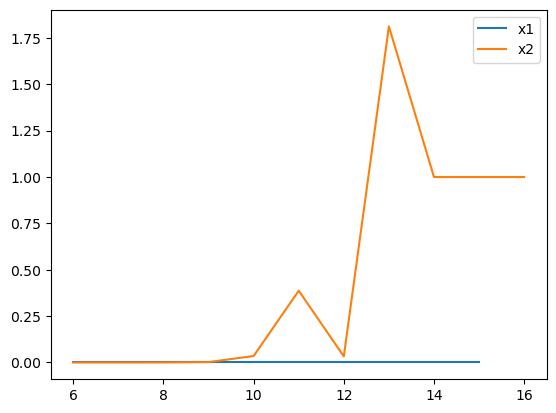

In [18]:
plt.plot(k,x2_error)
plt.plot(k,x1_error)
plt.legend(["x1","x2"])
plt.show()

- osservando i grafici ottenuti, si dica se le formule utilizzate per calcolare le due soluzioni hanno dato luogo ad algoritmi stabili, motivando opportunamente la risposta alla luce della teoria. [**Punti 6**]

La soluzione presentata non è stabile dato che lo spacing tra i due valori è molto grande, e quindi l'errore si propaga molto velocemente, inoltre il problema è mal condizionato, quindi anche il più piccolo errore può portare a risultati molto diversi da quelli attesi.
Ad esempio nel calcolo del delta:

In [21]:
b = 2**(2*k)-1/(3**(2*k))
a=1
c=-(2**(2*k))/(3**(2*k))
print("spacing dell'operazione b^2 =>\n",np.spacing(b**2))
print("4*a*c => \n",4*a*c)


spacing dell'operazione b^2 =>
 [1.86264515e-09 2.98023224e-08 4.76837158e-07 7.62939453e-06
 2.44140625e-04 1.95312500e-03 6.25000000e-02 1.00000000e+00
 1.60000000e+01 2.56000000e+02 7.70371978e-34]
4*a*c => 
 [-3.08293865e-02 -1.37019496e-02 -6.08975536e-03 -2.70655794e-03
  5.18979556e-03 -1.27458498e-02  6.46330899e-02  3.55632722e-01
 -5.97640004e-01  4.25184930e+00 -0.00000000e+00]


Notiamo infatti che dopo il quarto valore di K si crea dell'errore dato dallo spacing di $b^2$

- in caso di instabilita', si fornisca un algoritmo di calcolo stabile e si mostrino in un nuovo grafico gli
andamenti dei nuovi errori relativi ottenuti. [**Punti 6**]

C:\Users\utente\AppData\Local\Temp\ipykernel_19064\3173505157.py:1: RuntimeWarning: invalid value encountered in divide
  x2_new = c/x1


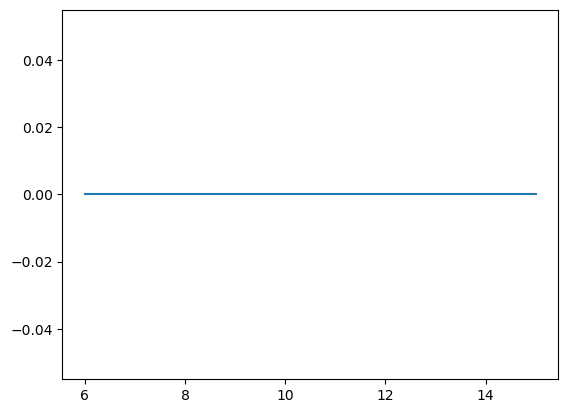

In [24]:
x2_new = c/x1 
plt.plot(k,err(x2,x2_new))
plt.show()